In [1]:

import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Show basic info
print("Shape of the dataset:", data.shape)
print("\nColumn names:", data.columns.tolist())
print("\nData types and nulls:")
print(data.info())

# Preview the first few rows
data.head()

Shape of the dataset: (1440, 11)

Column names: ['Stock', 'Time', 'TBill_Rate', 'CPI_Rate', 'Unemployment_Rate', 'Net_trade_Rate', 'GEPU_Rate', 'Exchange_Rate', 'Oil_prices_Rate', 'Google_Trends', 'avg_closing_price']

Data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stock              1440 non-null   object 
 1   Time               1440 non-null   object 
 2   TBill_Rate         1440 non-null   float64
 3   CPI_Rate           1440 non-null   float64
 4   Unemployment_Rate  1440 non-null   float64
 5   Net_trade_Rate     1440 non-null   float64
 6   GEPU_Rate          1440 non-null   float64
 7   Exchange_Rate      1440 non-null   float64
 8   Oil_prices_Rate    1440 non-null   float64
 9   Google_Trends      1440 non-null   int64  
 10  avg_closing_price  1440 non-null   float64
dtypes: float64(8), int64(1)

/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Stock,Time,TBill_Rate,CPI_Rate,Unemployment_Rate,Net_trade_Rate,GEPU_Rate,Exchange_Rate,Oil_prices_Rate,Google_Trends,avg_closing_price
0,AAPL,2013-01-01,0.07,0.2,6.6,0.086166,-25.208635,1.3304,0.010526,39,17.779371
1,AAPL,2013-02-01,0.10,0.2,6.6,0.086166,-25.208635,1.3347,0.010526,25,16.314605
2,AAPL,2013-03-01,0.09,0.2,6.6,9.839019,12.749274,1.2953,0.557836,23,15.780036
3,AAPL,2013-04-01,0.06,0.2,6.6,-5.180037,-5.632594,1.3025,-1.182751,28,14.991607
4,AAPL,2013-05-01,0.04,0.2,6.6,-8.758564,-20.436610,1.2983,0.360131,24,15.944740


In [2]:
# # Convert Time to datetime
# data['Time'] = pd.to_datetime(data['Time'])

# # Sort by Stock and Time (for panel structure)
# data = data.sort_values(by=['Stock', 'Time']).reset_index(drop=True)


# # Split into train and test by date (e.g., before and after 2020)
# train_data = data[data['Time'] < '2020-01-01']
# test_data = data[data['Time'] >= '2020-01-01']

# print("Training set:", train_data.shape)
# print("Testing set:", test_data.shape)

In [3]:
# Basic summary statistics for numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TBill_Rate,1440.0,1.488125,1.823493,0.020000,0.050000,0.480000,2.270000,5.340000
CPI_Rate,1440.0,0.244861,0.271308,-0.800000,0.100000,0.200000,0.400000,1.200000
Unemployment_Rate,1440.0,4.779167,1.649641,3.400000,3.800000,4.200000,5.200000,14.800000
Net_trade_Rate,1440.0,-0.710355,6.103320,-28.938390,-4.314209,-0.330140,2.888803,13.132105
GEPU_Rate,1440.0,2.266486,19.749861,-39.345064,-9.257952,-0.067335,10.497156,87.404920
Exchange_Rate,1440.0,1.153904,0.092703,0.985300,1.088450,1.123350,1.185250,1.382800
Oil_prices_Rate,1440.0,0.554522,12.164125,-51.048049,-5.280718,0.776821,5.164146,87.624861
Google_Trends,1440.0,13.540972,15.895366,1.000000,2.000000,9.000000,17.000000,100.000000
avg_closing_price,1440.0,116.508093,122.344188,1.796190,37.199903,72.446851,154.451555,833.188495


In [4]:
# Check for missing values
data.isnull().sum()

Stock                0
Time                 0
TBill_Rate           0
CPI_Rate             0
Unemployment_Rate    0
Net_trade_Rate       0
GEPU_Rate            0
Exchange_Rate        0
Oil_prices_Rate      0
Google_Trends        0
avg_closing_price    0
dtype: int64

In [5]:
# Check data types
data.dtypes

Stock                 object
Time                  object
TBill_Rate           float64
CPI_Rate             float64
Unemployment_Rate    float64
Net_trade_Rate       float64
GEPU_Rate            float64
Exchange_Rate        float64
Oil_prices_Rate      float64
Google_Trends          int64
avg_closing_price    float64
dtype: object

In [6]:
# Convert Google_Trends to float for consistency
data['Google_Trends'] = data['Google_Trends'].astype(float)

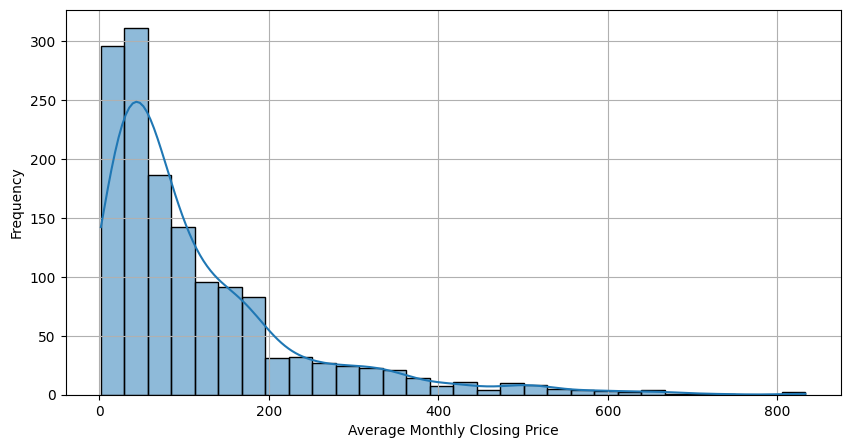

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data['avg_closing_price'], bins=30, kde=True)
plt.grid(True)
plt.title("")
plt.xlabel("Average Monthly Closing Price")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Count missing values per column
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

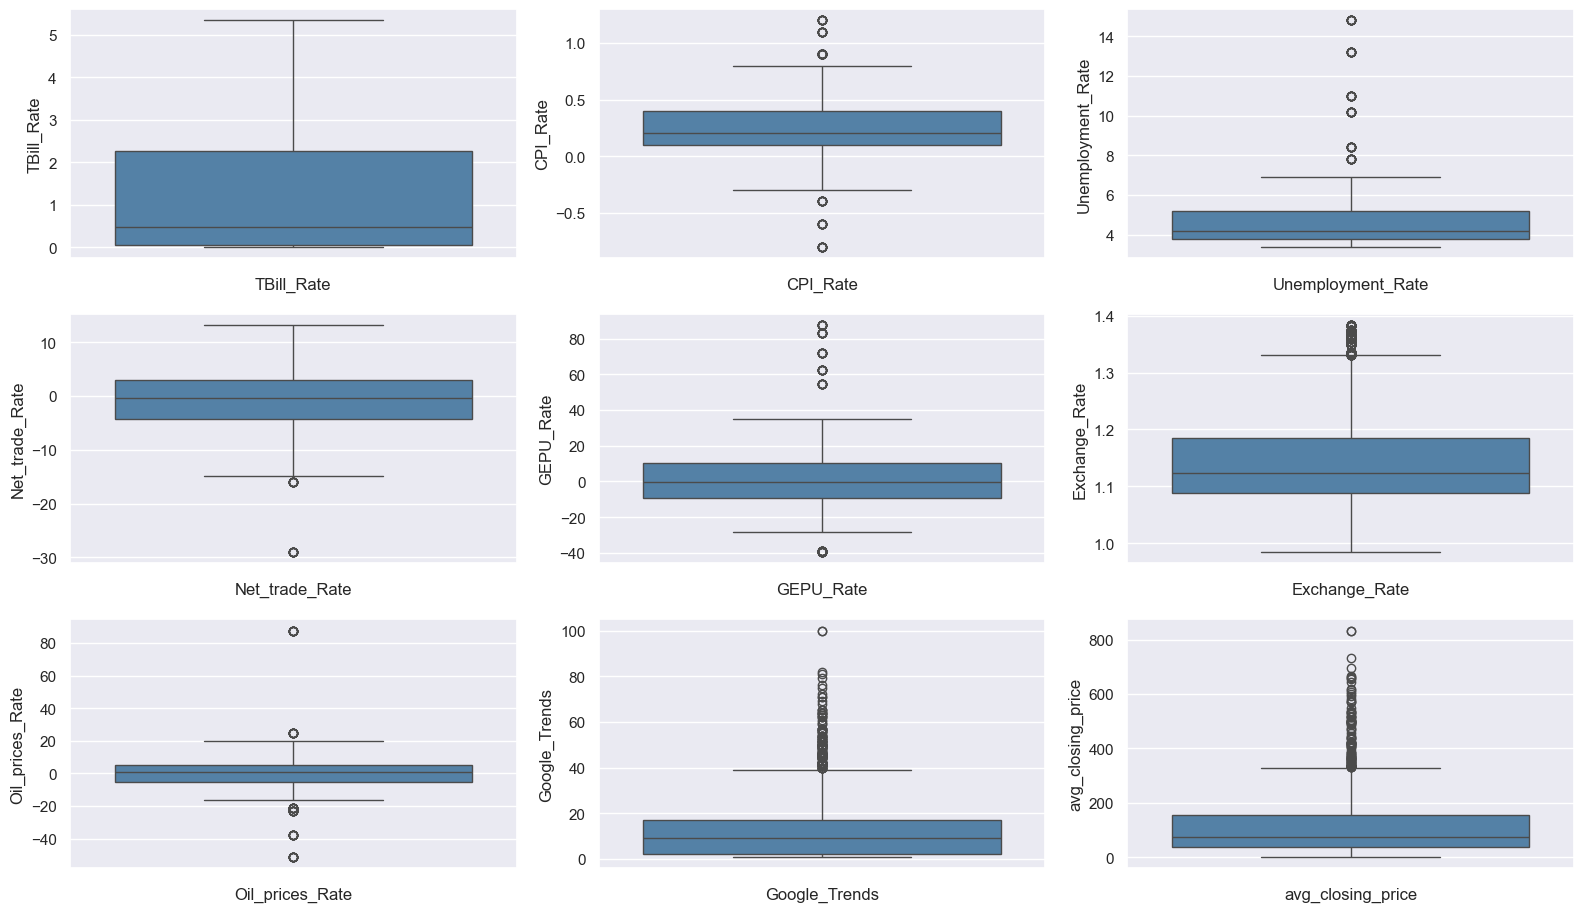

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Bloomberg-style dark grid
sns.set(style="darkgrid")

# Define numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numeric feature
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col], color="steelblue")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

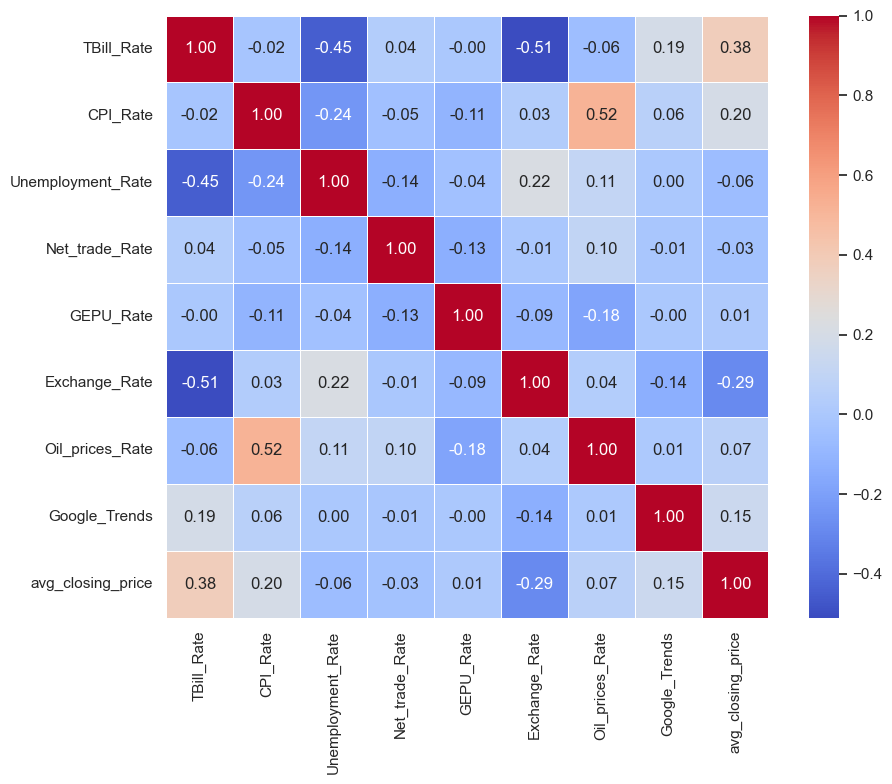

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

plt.title("", fontsize=13)
plt.tight_layout()
plt.show()

/var/folders/d6/n6pspgm12mqdk124xkztz2pr0000gn/T/ipykernel_97454/2262883337.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette="crest")


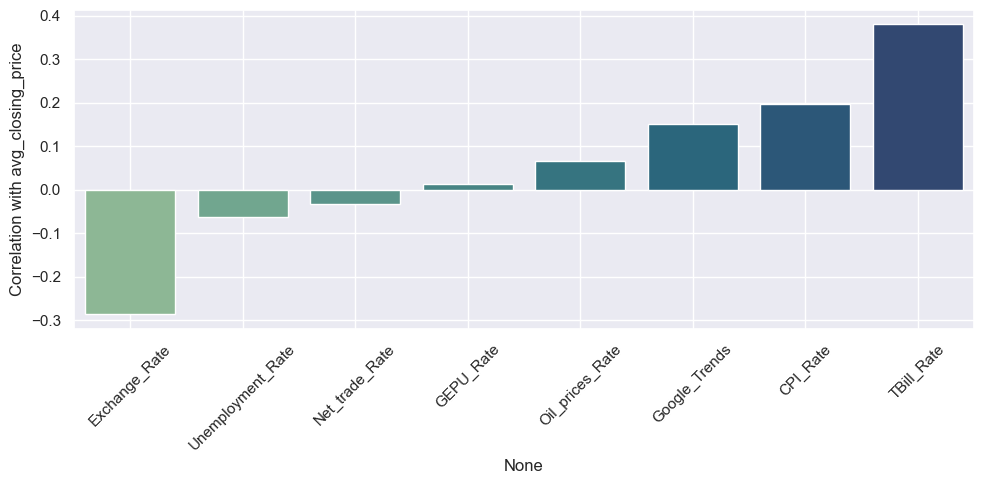

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your features and target
features = ['TBill_Rate', 'CPI_Rate', 'Unemployment_Rate', 'Net_trade_Rate',
            'GEPU_Rate', 'Exchange_Rate', 'Oil_prices_Rate', 'Google_Trends']
target = 'avg_closing_price'

# Compute correlation between features and target
corr = data[features + [target]].corr()[target].drop(target).sort_values()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=corr.index, y=corr.values, palette="crest")
plt.xticks(rotation=45)
plt.ylabel("Correlation with avg_closing_price")
plt.title("")
plt.grid(True)
plt.tight_layout()
plt.show()

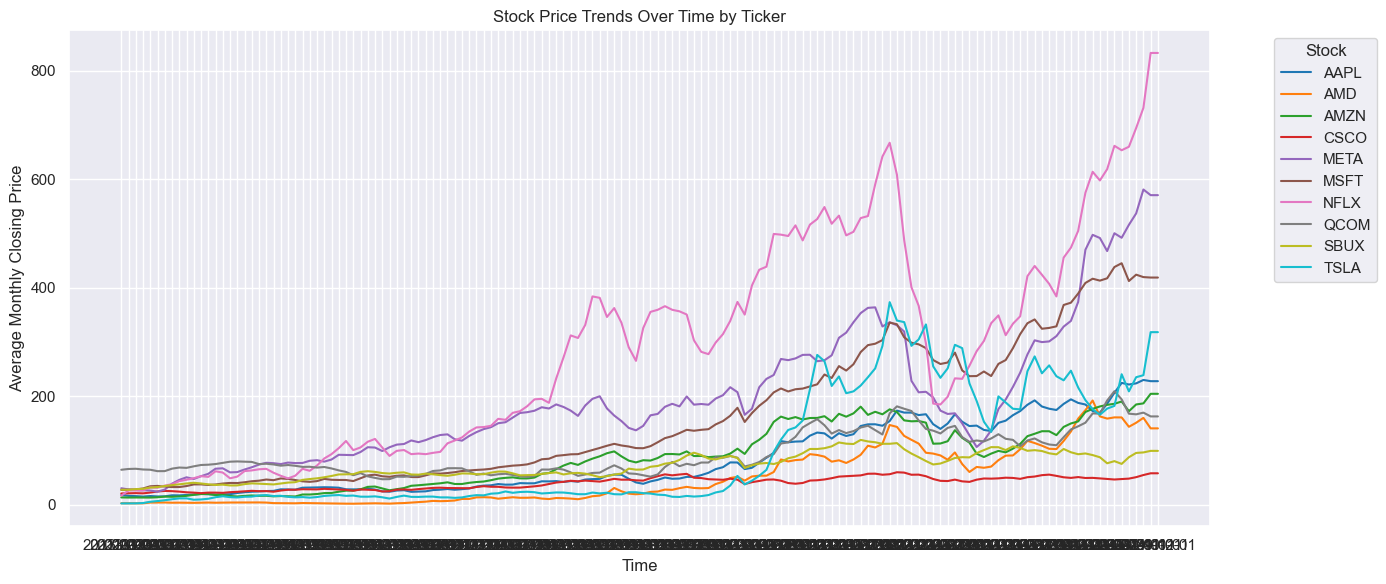

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Lineplot of avg closing price over time, separated by stock
sns.lineplot(data=data, x='Time', y='avg_closing_price', hue='Stock', palette='tab10')

plt.xlabel("Time")
plt.ylabel("Average Monthly Closing Price")
plt.title("Stock Price Trends Over Time by Ticker")
plt.grid(True)
plt.legend(title='Stock', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
# Count number of observations per stock
stock_counts = data['Stock'].value_counts()
print(stock_counts)

Stock
AAPL    144
AMD     144
AMZN    144
CSCO    144
META    144
MSFT    144
NFLX    144
QCOM    144
SBUX    144
TSLA    144
Name: count, dtype: int64


In [14]:
# Copy data to avoid overwriting original
vol_data = data.copy()

# Sort to ensure correct diff order
vol_data = vol_data.sort_values(by=['Stock', 'Time']).reset_index(drop=True)

# Define columns for which to calculate volatility
vol_cols = ['avg_closing_price', 'TBill_Rate', 'CPI_Rate', 'Unemployment_Rate',
            'Net_trade_Rate', 'GEPU_Rate', 'Exchange_Rate', 'Oil_prices_Rate', 'Google_Trends']

# Calculate monthly percentage change per stock
for col in vol_cols:
    vol_data[f'{col}_pct_change'] = vol_data.groupby('Stock')[col].pct_change() * 100

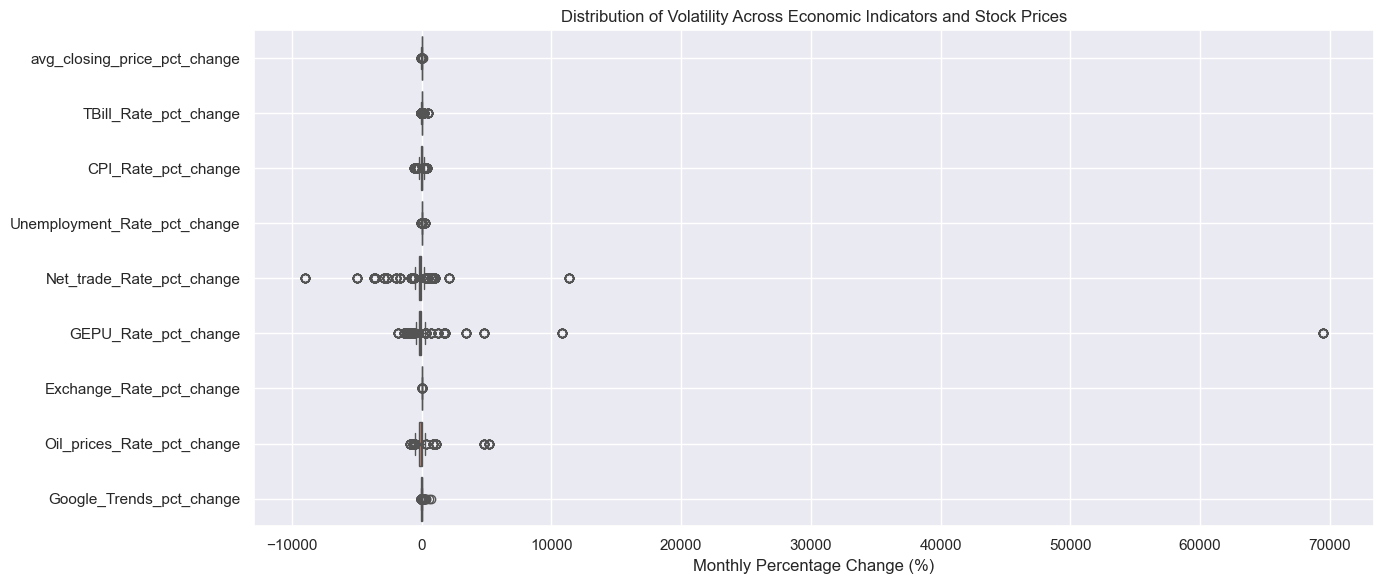

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract just the percentage change columns
pct_cols = [col for col in vol_data.columns if '_pct_change' in col]

plt.figure(figsize=(14, 6))
sns.boxplot(data=vol_data[pct_cols], orient='h', palette='coolwarm')

plt.xlabel("Monthly Percentage Change (%)")
plt.title("Distribution of Volatility Across Economic Indicators and Stock Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

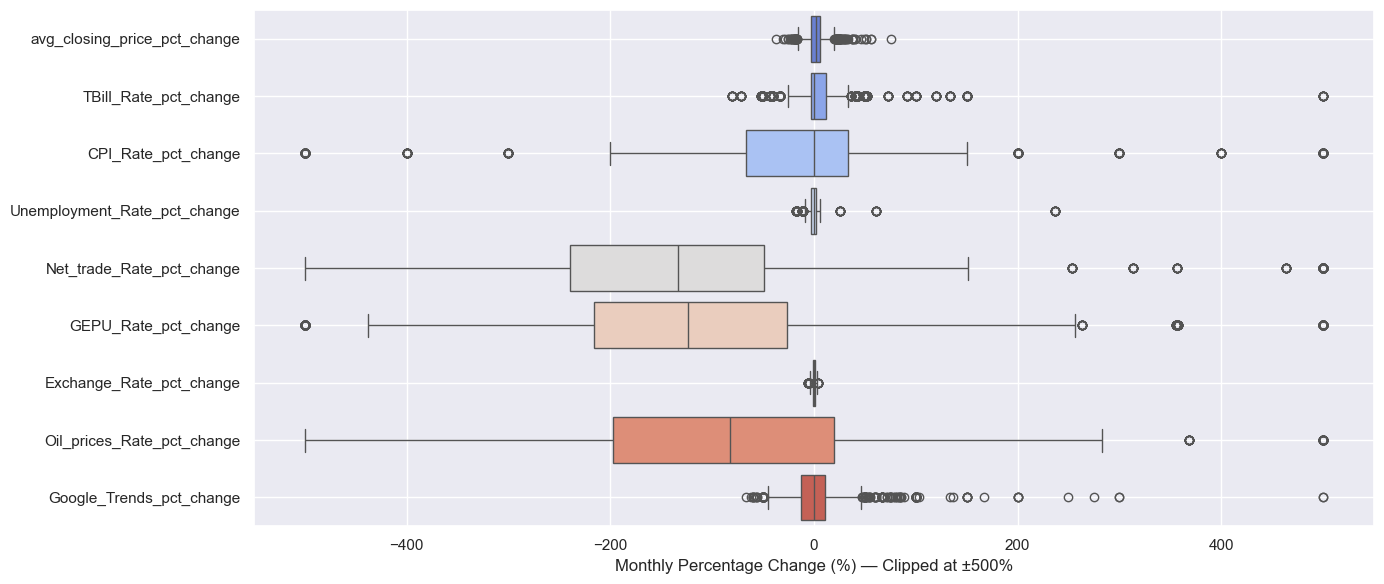

In [16]:
# Clip extreme percentage changes to within ±500% to avoid distortion
clipped_data = vol_data[pct_cols].clip(lower=-500, upper=500)

plt.figure(figsize=(14, 6))
sns.boxplot(data=clipped_data, orient='h', palette='coolwarm')

plt.xlabel("Monthly Percentage Change (%) — Clipped at ±500%")
plt.title("")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Sort data to ensure correct order before calculating returns
data = data.sort_values(by=['Stock', 'Time']).reset_index(drop=True)

# Calculate monthly return (% change) for each stock
data['Return'] = data.groupby('Stock')['avg_closing_price'].pct_change().shift(-1)

# Drop rows with missing return values
data = data.dropna(subset=['Return']).reset_index(drop=True)

# Preview
data[['Stock', 'Time', 'avg_closing_price', 'Return']].head()

,Stock,Time,avg_closing_price,Return
0,AAPL,2013-01-01,17.779371,-0.082386
1,AAPL,2013-02-01,16.314605,-0.032766
2,AAPL,2013-03-01,15.780036,-0.049964
3,AAPL,2013-04-01,14.991607,0.063578
4,AAPL,2013-05-01,15.944740,-0.046846


In [18]:
# Sort to keep temporal order
data = data.sort_values(by=['Stock', 'Time']).reset_index(drop=True)

# Lag features
data['lag_1_return'] = data.groupby('Stock')['Return'].shift(1)
data['lag_2_return'] = data.groupby('Stock')['Return'].shift(2)
data['lag_3_return'] = data.groupby('Stock')['Return'].shift(3)

# Rolling statistics
data['rolling_mean_return_3'] = data.groupby('Stock')['Return'].transform(lambda x: x.rolling(window=3).mean())
data['rolling_std_return_3'] = data.groupby('Stock')['Return'].transform(lambda x: x.rolling(window=3).std())
data['rolling_mean_google'] = data.groupby('Stock')['Google_Trends'].transform(lambda x: x.rolling(window=3).mean())
data['rolling_mean_gepu'] = data.groupby('Stock')['GEPU_Rate'].transform(lambda x: x.rolling(window=3).mean())

# Delta features (month-over-month changes)
data['delta_GEPU'] = data.groupby('Stock')['GEPU_Rate'].transform(lambda x: x.diff())
data['delta_Oil'] = data.groupby('Stock')['Oil_prices_Rate'].transform(lambda x: x.diff())

# Interaction terms
data['Google_x_Oil'] = data['Google_Trends'] * data['Oil_prices_Rate']
data['Unemployment_x_CPI'] = data['Unemployment_Rate'] * data['CPI_Rate']

In [19]:
import numpy
import sklearn
import shap
from sklearn.inspection import permutation_importance
print("✅ All working.")

✅ All working.


In [20]:
# Drop rows with any missing values
data_lagged = data.dropna(subset=[
    'Return', 'lag_1_return', 'lag_2_return', 'lag_3_return',
    'rolling_mean_return_3', 'rolling_std_return_3',
    'rolling_mean_google', 'rolling_mean_gepu',
    'delta_GEPU', 'delta_Oil'
]).reset_index(drop=True)

# Define features
features = [
    'TBill_Rate', 'CPI_Rate', 'Unemployment_Rate', 'Net_trade_Rate',
    'GEPU_Rate', 'Exchange_Rate', 'Oil_prices_Rate', 'Google_Trends',
    'lag_1_return', 'lag_2_return',
    'lag_3_return',
    'rolling_mean_return_3', 
    'rolling_std_return_3',
    'rolling_mean_google', 'rolling_mean_gepu',
    'delta_GEPU', 'delta_Oil',
    'Google_x_Oil', 'Unemployment_x_CPI'
]
target = 'Return'

# Time-based split
train_data = data_lagged[data_lagged['Time'] < '2023-01-01']
test_data = data_lagged[data_lagged['Time'] >= '2023-01-01']

X_train = train_data[features]
X_test = test_data[features]
y_train = train_data[target]
y_test = test_data[target]

# Scale
from sklearn.preprocessing import RobustScaler
# Scale features properly and convert back to DataFrame
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features, index=X_test.index)

In [21]:
print(y_train.nunique(), y_test.nunique())

1170 221


In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("Unique values in y_train:", y_train.nunique())
print("Unique values in y_test:", y_test.nunique())

# Check correlations
print("\nCorrelation with Return (train set):")
cor_df = pd.DataFrame(X_train, columns=features)
cor_df['Return'] = y_train.values
print(cor_df.corr()['Return'].sort_values(ascending=False))

X_train shape: (1170, 19)
X_test shape: (230, 19)
y_train shape: (1170,)
Unique values in y_train: 1170
Unique values in y_test: 221

Correlation with Return (train set):
Return                   1.000000
rolling_mean_return_3    0.639318
lag_1_return             0.256179
rolling_std_return_3     0.172045
Unemployment_Rate        0.147249
Google_x_Oil             0.085062
Oil_prices_Rate          0.077339
lag_3_return             0.076753
Exchange_Rate            0.069943
rolling_mean_google      0.050198
Google_Trends            0.040704
lag_2_return             0.035688
GEPU_Rate                0.028459
rolling_mean_gepu        0.027763
delta_Oil                0.018901
delta_GEPU               0.011819
Unemployment_x_CPI      -0.038532
Net_trade_Rate          -0.040341
CPI_Rate                -0.065102
TBill_Rate              -0.073689
Name: Return, dtype: float64


In [23]:
print(X_train.shape, X_test.shape)
print(y_train.unique())

(1170, 19) (230, 19)
[ 0.06357777 -0.04684645  0.00850517 ... -0.14549726 -0.20014043
 -0.12273268]


## Machine Learning Models

## Random Forest

In [24]:
# Re-initialize with better control to reduce overfitting
from sklearn.ensemble import RandomForestRegressor
rf_model_tuned = RandomForestRegressor(
    n_estimators=100,         # fewer trees = faster and simpler
    max_depth=8,              # very shallow trees to generalize
    min_samples_leaf=7,       # reduce leaf-level noise
    random_state=42,
    n_jobs=-1
)

# Train the tuned model
rf_model_tuned.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_tuned = rf_model_tuned.predict(X_train_scaled)
y_test_pred_tuned = rf_model_tuned.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation for tuned model
rmse_train_tuned = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
mae_train_tuned = mean_absolute_error(y_train, y_train_pred_tuned)
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)

rmse_test_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
mae_test_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
r2_test_tuned = r2_score(y_test, y_test_pred_tuned)

# Print results
print("🔹 Tuned Random Forest – Monthly Return Prediction")
print(f"Train RMSE: {rmse_train_tuned:.4f}, MAE: {mae_train_tuned:.4f}, R²: {r2_train_tuned:.4f}")
print(f"Test  RMSE: {rmse_test_tuned:.4f}, MAE: {mae_test_tuned:.4f}, R²: {r2_test_tuned:.4f}")

🔹 Tuned Random Forest – Monthly Return Prediction
Train RMSE: 0.0361, MAE: 0.0217, R²: 0.8524
Test  RMSE: 0.0460, MAE: 0.0292, R²: 0.7077


## XGBOOST

In [26]:
from xgboost import XGBRegressor
from xgboost import XGBRegressor

# Initialize XGBoost model with default parameters

xgb_model = XGBRegressor(
    n_estimators=750,           # reduce just a bit
    max_depth=2,
    learning_rate=0.05,
    min_child_weight=9,         # more conservative split
    gamma=0.01,                 # discourage unnecessary splits
    subsample=0.70,
    colsample_bytree=0.9,
    reg_alpha=0.03,            # L1 regularization
    reg_lambda=0.2,            # stronger L2 regularization
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# Print results
print("🔹 XGBoost Performance – Monthly Return Prediction")
print(f"Train RMSE: {rmse_train_xgb:.4f}, MAE: {mae_train_xgb:.4f}, R²: {r2_train_xgb:.4f}")
print(f"Test  RMSE: {rmse_test_xgb:.4f}, MAE: {mae_test_xgb:.4f}, R²: {r2_test_xgb:.4f}")

🔹 XGBoost Performance – Monthly Return Prediction
Train RMSE: 0.0200, MAE: 0.0138, R²: 0.9548
Test  RMSE: 0.0306, MAE: 0.0209, R²: 0.8708


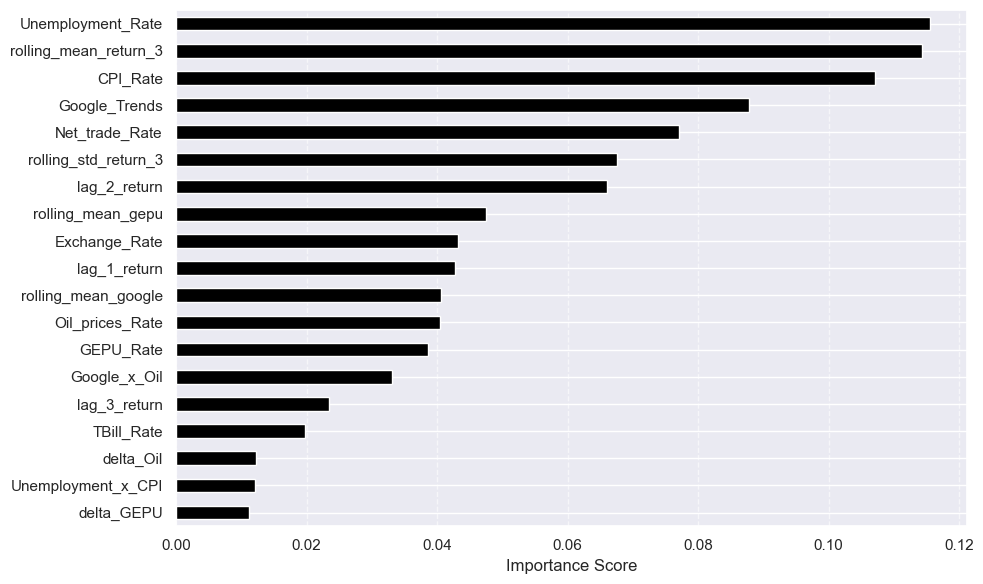

In [28]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Train basic XGBoost model if not already trained
xgb_model = XGBRegressor(
    n_estimators=750,           # reduce just a bit
    max_depth=2,
    learning_rate=0.05,
    min_child_weight=9,         # more conservative split
    gamma=0.01,                 # discourage unnecessary splits
    subsample=0.70,
    colsample_bytree=0.9,
    reg_alpha=0.03,            # L1 regularization
    reg_lambda=0.2,            # stronger L2 regularization
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
importances_xgb = importances_xgb.sort_values(ascending=True)

# Plot (same Bloomberg style)
plt.figure(figsize=(10, 6))
importances_xgb.plot(kind='barh', color='black')
plt.title("")
plt.xlabel("Importance Score")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## ElasticNet (L1 + L2 Combined)

In [29]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0, max_iter=100000, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_elastic = elastic_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_model.predict(X_test_scaled)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+00, tolerance: 1.035e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


In [30]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_elastic))
mae_train = mean_absolute_error(y_train, y_train_pred_elastic)
r2_train = r2_score(y_train, y_train_pred_elastic)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_elastic))
mae_test = mean_absolute_error(y_test, y_test_pred_elastic)
r2_test = r2_score(y_test, y_test_pred_elastic)

print("🔹 ElasticNet – Monthly Return Prediction")
print(f"Train RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}")
print(f"Test  RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}")

🔹 ElasticNet – Monthly Return Prediction
Train RMSE: 0.0348, MAE: 0.0245, R²: 0.8631
Test  RMSE: 0.0354, MAE: 0.0244, R²: 0.8265


In [31]:
# First define the function if not done yet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred, results_list):
    results_list.append({
        'Model': name,
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_RMSE':  np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_MAE':  mean_absolute_error(y_train, y_train_pred),
        'Test_MAE':   mean_absolute_error(y_test, y_test_pred),
        'Train_R2':   r2_score(y_train, y_train_pred),
        'Test_R2':    r2_score(y_test, y_test_pred)
    })

# Evaluate all models automatically
results_list = []

# evaluate_model("Linear Regression", y_train, y_train_pred_lr, y_test, y_test_pred_lr, results_list)
#evaluate_model("Decision Tree", y_train, y_train_pred_dt, y_test, y_test_pred_dt, results_list)
evaluate_model("Random Forest", y_train, y_train_pred_tuned, y_test, y_test_pred_tuned, results_list)
evaluate_model("XGBoost", y_train, y_train_pred_xgb, y_test, y_test_pred_xgb, results_list)
#evaluate_model("MLP (ANN)", y_train, y_train_pred_dl, y_test, y_test_pred_dl, results_list)
evaluate_model("ElasticNet", y_train, y_train_pred_elastic, y_test, y_test_pred_elastic, results_list)
#evaluate_model("Lasso", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso, results_list)
#evaluate_model("CatBoost", y_train, y_train_pred_cat, y_test, y_test_pred_cat, results_list)

# Create the results DataFrame
import pandas as pd
results_df = pd.DataFrame(results_list)

# Show it
display(results_df)

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results_list)

# Display table
display(results_df)

,Model,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_R2,Test_R2
0,Random Forest,0.036140,0.045997,0.021749,0.029227,0.852368,0.707690
1,XGBoost,0.019997,0.030584,0.013775,0.020872,0.954802,0.870761
2,ElasticNet,0.034799,0.035439,0.024473,0.024364,0.863125,0.826481


,Model,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_R2,Test_R2
0,Random Forest,0.036140,0.045997,0.021749,0.029227,0.852368,0.707690
1,XGBoost,0.019997,0.030584,0.013775,0.020872,0.954802,0.870761
2,ElasticNet,0.034799,0.035439,0.024473,0.024364,0.863125,0.826481


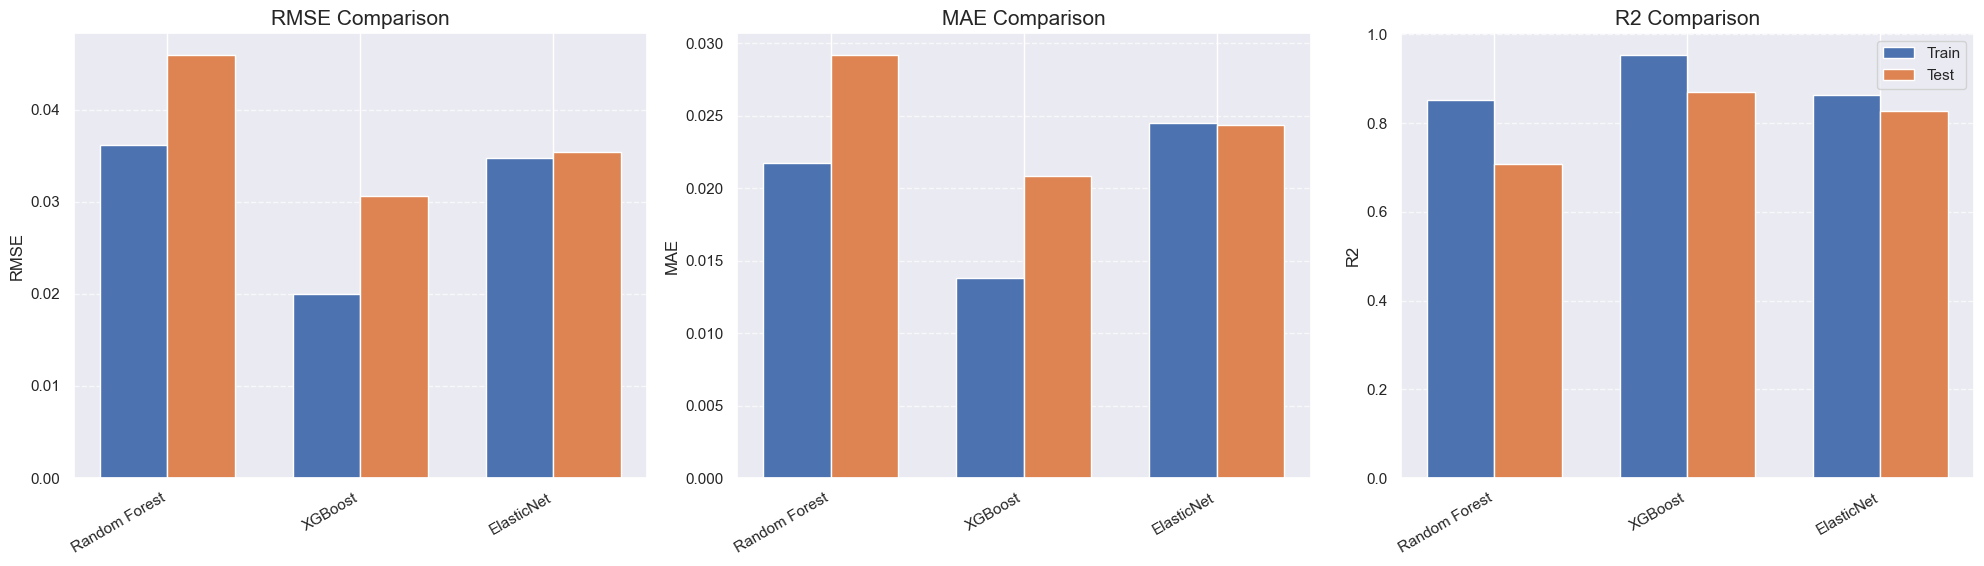

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the column names if needed
results_df = results_df.rename(columns=lambda x: x.replace(' ', '_'))

# Metrics to plot
metrics = ['RMSE', 'MAE', 'R2']

# Define models
models = results_df['Model'].values
x = np.arange(len(models))  # label locations
width = 0.35  # bar width

# Create a single large plot for all metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 6))


for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    train_metric = results_df[f'Train_{metric}']
    test_metric = results_df[f'Test_{metric}']
    
    ax.bar(x - width/2, train_metric, width, label='Train')
    ax.bar(x + width/2, test_metric, width, label='Test',)
    
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=30, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if idx == 2:  # Only show legend once
        ax.legend()

plt.suptitle('', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

In [33]:
# Cross Validation Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Define custom scorers
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Define KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define evaluation function
def evaluate_model_cv(model, X, y, model_name):
    scores_rmse = cross_val_score(model, X, y, scoring=rmse_scorer, cv=kfold)
    scores_mae = cross_val_score(model, X, y, scoring=mae_scorer, cv=kfold)
    scores_r2 = cross_val_score(model, X, y, scoring=r2_scorer, cv=kfold)
    
    print(f"🔹 {model_name} Cross-Validation Results:")
    print(f"Average RMSE: {-scores_rmse.mean():.4f} (+/- {scores_rmse.std():.4f})")
    print(f"Average MAE: {-scores_mae.mean():.4f} (+/- {scores_mae.std():.4f})")
    print(f"Average R² : {scores_r2.mean():.4f} (+/- {scores_r2.std():.4f})")
    print("-"*50)
    
    return scores_rmse, scores_mae, scores_r2

In [34]:
# ElasticNet Cross Validation 

from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0, max_iter=100000, random_state=42)

# Run Cross-Validation
elasticnet_rmse_scores, elasticnet_mae_scores, elasticnet_r2_scores = evaluate_model_cv(
    elasticnet_model, 
    X_train_scaled, 
    y_train, 
    model_name="ElasticNet"
)

🔹 ElasticNet Cross-Validation Results:
Average RMSE: 0.0356 (+/- 0.0030)
Average MAE: 0.0250 (+/- 0.0020)
Average R² : 0.8537 (+/- 0.0156)
--------------------------------------------------


In [35]:
# XGBoost Cross Validation 

from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=750,           # reduce just a bit
    max_depth=2,
    learning_rate=0.05,
    min_child_weight=9,         # more conservative split
    gamma=0.01,                 # discourage unnecessary splits
    subsample=0.70,
    colsample_bytree=0.9,
    reg_alpha=0.03,            # L1 regularization
    reg_lambda=0.2,            # stronger L2 regularization
    random_state=42
)

# Run Cross-Validation
xgb_rmse_scores, xgb_mae_scores, xgb_r2_scores = evaluate_model_cv(
    xgb_model, 
    X_train_scaled, 
    y_train, 
    model_name="XGBoost"
)

🔹 XGBoost Cross-Validation Results:
Average RMSE: 0.0330 (+/- 0.0066)
Average MAE: 0.0210 (+/- 0.0024)
Average R² : 0.8716 (+/- 0.0476)
--------------------------------------------------


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model_tuned = RandomForestRegressor(
    n_estimators=100,         # fewer trees = faster and simpler
    max_depth=8,              # very shallow trees to generalize
    min_samples_leaf=7,       # reduce leaf-level noise
    random_state=42,
    n_jobs=-1
)

# Run Cross-Validation
rf_rmse_scores, rf_mae_scores, rf_r2_scores = evaluate_model_cv(
    rf_model_tuned, 
    X_train_scaled, 
    y_train, 
    model_name="Random Forest"
)

🔹 Random Forest Cross-Validation Results:
Average RMSE: 0.0499 (+/- 0.0068)
Average MAE: 0.0307 (+/- 0.0026)
Average R² : 0.7110 (+/- 0.0661)
--------------------------------------------------


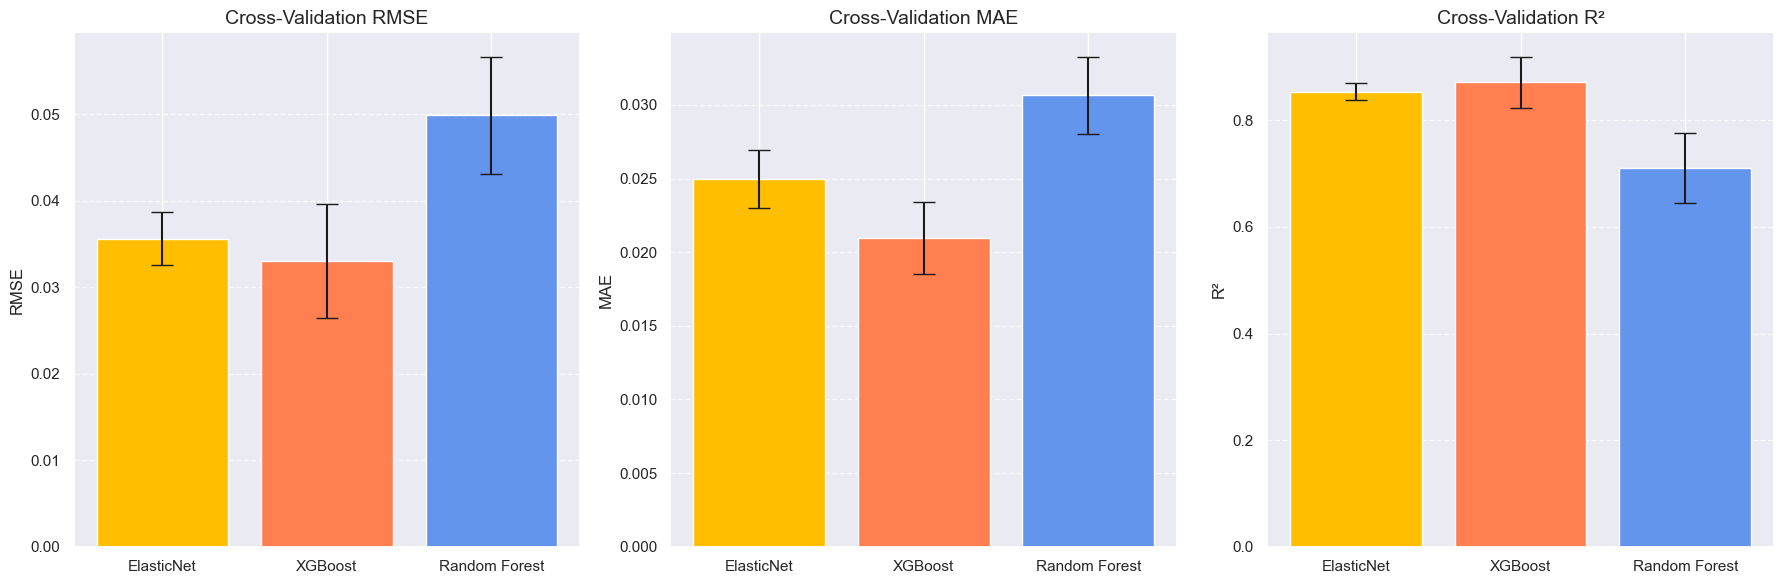

In [37]:
# --- Plot Cross Validation Results ---

import matplotlib.pyplot as plt

# Prepare data
models = ['ElasticNet', 'XGBoost', 'Random Forest']

avg_rmse = [
    -elasticnet_rmse_scores.mean(), 
    -xgb_rmse_scores.mean(), 
    -rf_rmse_scores.mean()
]
std_rmse = [
    elasticnet_rmse_scores.std(), 
    xgb_rmse_scores.std(), 
    rf_rmse_scores.std()
]

avg_mae = [
    -elasticnet_mae_scores.mean(), 
    -xgb_mae_scores.mean(), 
    -rf_mae_scores.mean()
]
std_mae = [
    elasticnet_mae_scores.std(), 
    xgb_mae_scores.std(), 
    rf_mae_scores.std()
]

avg_r2 = [
    elasticnet_r2_scores.mean(), 
    xgb_r2_scores.mean(), 
    rf_r2_scores.mean()
]
std_r2 = [
    elasticnet_r2_scores.std(), 
    xgb_r2_scores.std(), 
    rf_r2_scores.std()
]

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')
colors = ['#FFBF00', '#FF7F50', '#6495ED']  # ElasticNet (gold), XGBoost (coral), Random Forest (blue)

# RMSE Plot
axes[0].bar(models, avg_rmse, yerr=std_rmse, capsize=8, color=colors)
axes[0].set_title('Cross-Validation RMSE', fontsize=14)
axes[0].set_ylabel('RMSE')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# MAE Plot
axes[1].bar(models, avg_mae, yerr=std_mae, capsize=8, color=colors)
axes[1].set_title('Cross-Validation MAE', fontsize=14)
axes[1].set_ylabel('MAE')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# R² Plot
axes[2].bar(models, avg_r2, yerr=std_r2, capsize=8, color=colors)
axes[2].set_title('Cross-Validation R²', fontsize=14)
axes[2].set_ylabel('R²')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: Us

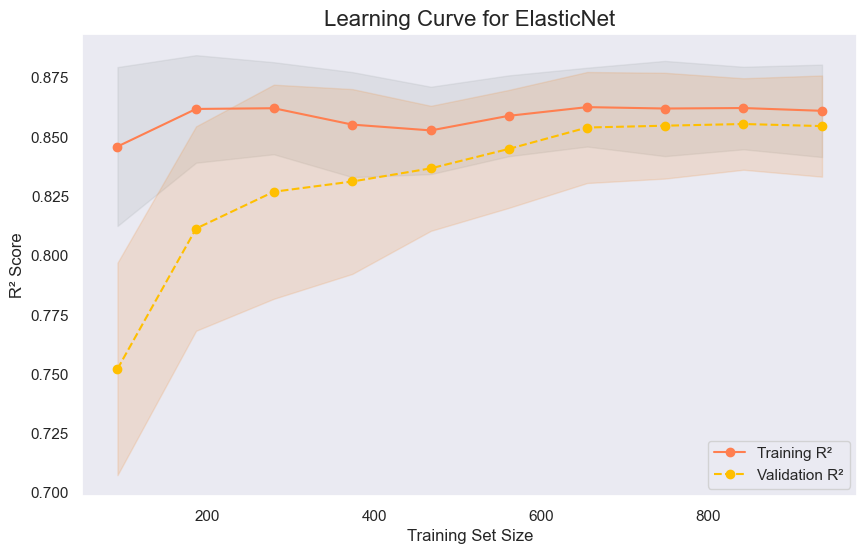

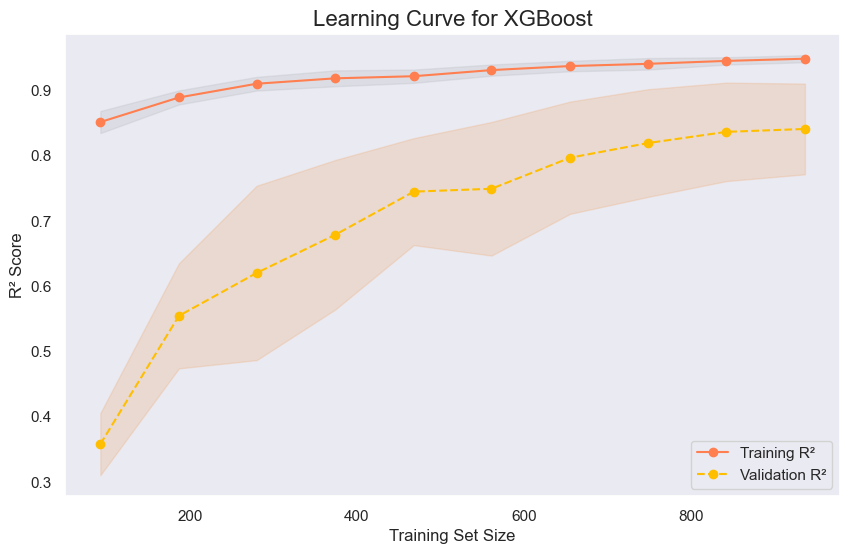

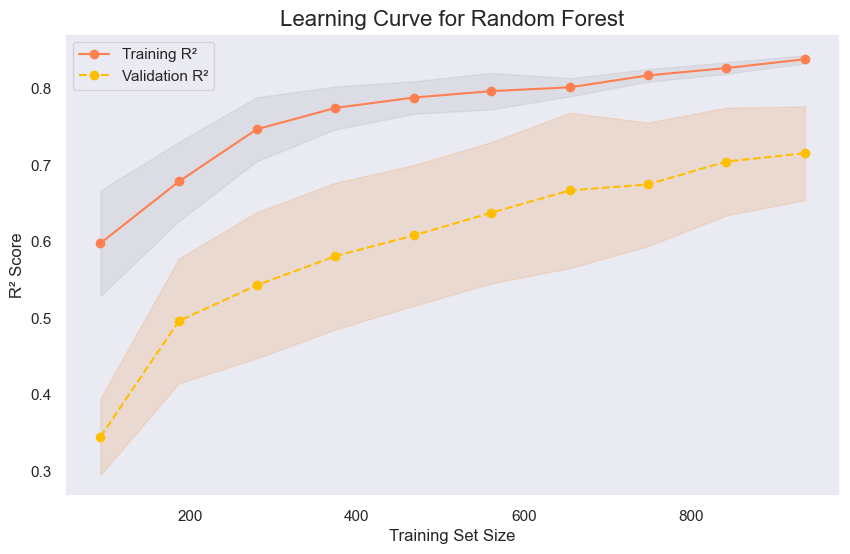

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# original ElasticNet model
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0, max_iter=100000, random_state=42)

rf_model_tuned = RandomForestRegressor(
    n_estimators=100,         # fewer trees = faster and simpler
    max_depth=8,              # very shallow trees to generalize
    min_samples_leaf=7,       # reduce leaf-level noise
    random_state=42,
    n_jobs=-1
)

# original XGBoost model
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
   n_estimators=750,           # reduce just a bit
    max_depth=2,
    learning_rate=0.05,
    min_child_weight=9,         # more conservative split
    gamma=0.01,                 # discourage unnecessary splits
    subsample=0.70,
    colsample_bytree=0.9,
    reg_alpha=0.03,            # L1 regularization
    reg_lambda=0.2,            # stronger L2 regularization
    random_state=42
)

# Learning Curve Plot Function 
def plot_learning_curve(model, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='#FF7F50', label="Training R²")
    plt.plot(train_sizes, test_mean, 'o--', color='#FFBF00', label="Validation R²")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='#A6ACAF')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='#EB984E')

    plt.title(f"Learning Curve for {title}", fontsize=16)
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.grid()
    plt.legend()
    plt.show()

# Plot for both models correctly 
plot_learning_curve(elasticnet_model, "ElasticNet", X_train_scaled, y_train)
plot_learning_curve(xgb_model, "XGBoost", X_train_scaled, y_train)
plot_learning_curve(rf_model_tuned, "Random Forest", X_train_scaled, y_train)

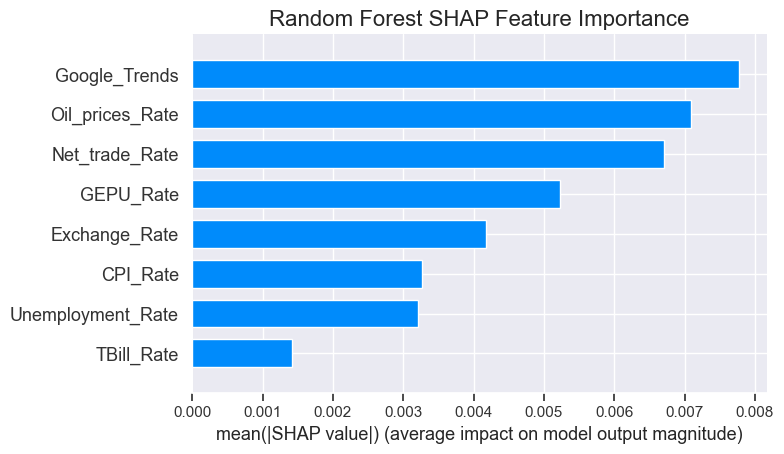

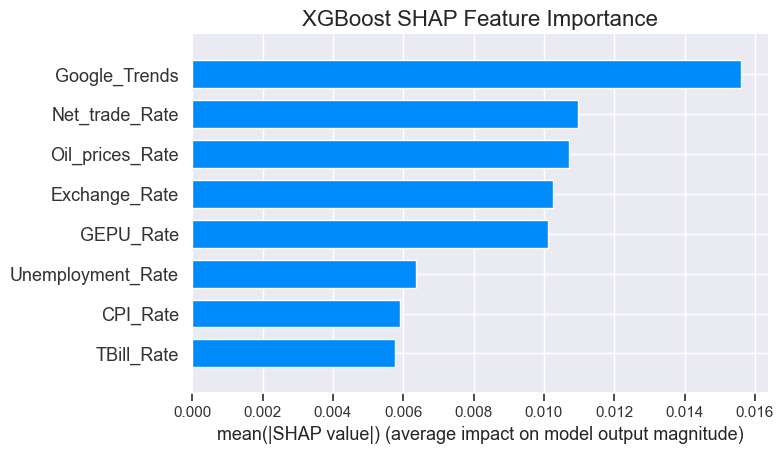

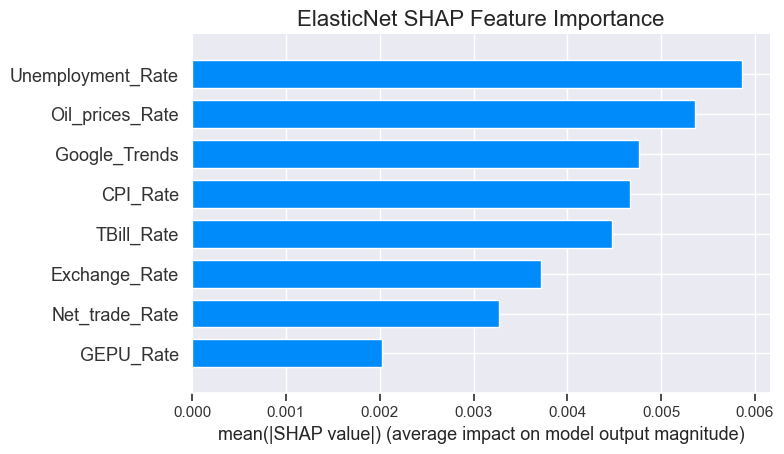

In [39]:
# SHAP Values
import numpy as np
if not hasattr(np, 'bool'):
    np.bool = bool
if not hasattr(np, 'int'):
    np.int = int
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
# data = pd.read_csv('cleaned_data.csv')
data = data_lagged
data['Time'] = pd.to_datetime(data['Time'])
data = data.sort_values(by=['Stock', 'Time']).reset_index(drop=True)
# Define features and target
features = [
    'TBill_Rate', 'CPI_Rate', 'Unemployment_Rate', 'Net_trade_Rate',
    'GEPU_Rate', 'Exchange_Rate', 'Oil_prices_Rate', 'Google_Trends',
    #'lag_1_return', 'lag_2_return',
    #'lag_3_return',
    #'rolling_mean_return_3', 
    #'rolling_std_return_3',
    #'rolling_mean_google', 'rolling_mean_gepu',
    #'delta_GEPU', 'delta_Oil',
    #'Google_x_Oil', 'Unemployment_x_CPI'
]
target = 'Return'
# Split the data into features and target
X = data[features]
y = data[target]
# Scale the features
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features, index=X.index)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize models
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0, max_iter=100000, random_state=42)
rf_model_tuned = RandomForestRegressor(
    n_estimators=100,         # fewer trees = faster and simpler
    max_depth=8,              # very shallow trees to generalize
    min_samples_leaf=7,       # reduce leaf-level noise
    random_state=42,
    n_jobs=-1
)
xgb_model = XGBRegressor(
    n_estimators=873,
    max_depth=3,
    learning_rate=0.0348,
    min_child_weight=3,
    gamma=8.65e-6,
    subsample=0.6114,
    colsample_bytree=0.8830,
    reg_alpha=4.10e-7,
    reg_lambda=1.79e-7,
    random_state=42
)
# Train the models
elasticnet_model.fit(X_train, y_train)
rf_model_tuned.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
# Initialize SHAP explainer
# SHAP explainers
explainer_rf = shap.TreeExplainer(rf_model_tuned)
explainer_xgb = shap.TreeExplainer(xgb_model)
explainer_elastic = shap.Explainer(elasticnet_model, X_train)
# Calculate SHAP values
shap_values_rf = explainer_rf(X_test)
shap_values_xgb = explainer_xgb(X_test)
shap_values_elastic = explainer_elastic(X_test)
# SHAP beeswarm summary plot for Random Forest
# SHAP bar summary plot for Random Forest
import matplotlib.pyplot as plt

# Random Forest
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", show=False)
plt.title("Random Forest SHAP Feature Importance", fontsize=16)
plt.tight_layout()
plt.show()

# XGBoost
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=False)
plt.title("XGBoost SHAP Feature Importance", fontsize=16)
plt.tight_layout()
plt.show()

# ElasticNet
shap.summary_plot(shap_values_elastic, X_test, plot_type="bar", show=False)
plt.title("ElasticNet SHAP Feature Importance", fontsize=16)
plt.tight_layout()
plt.show()

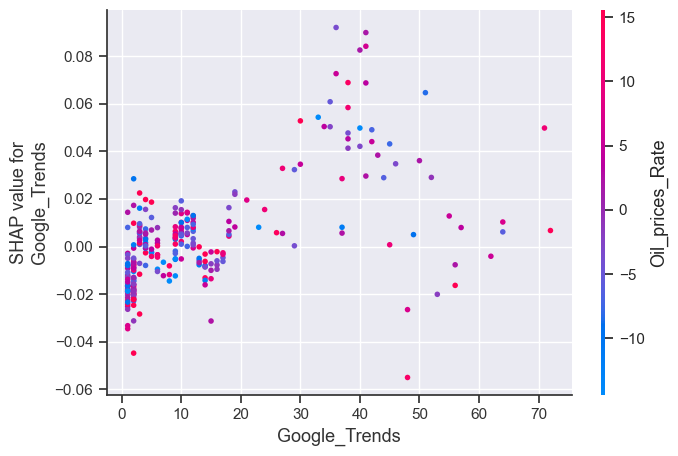

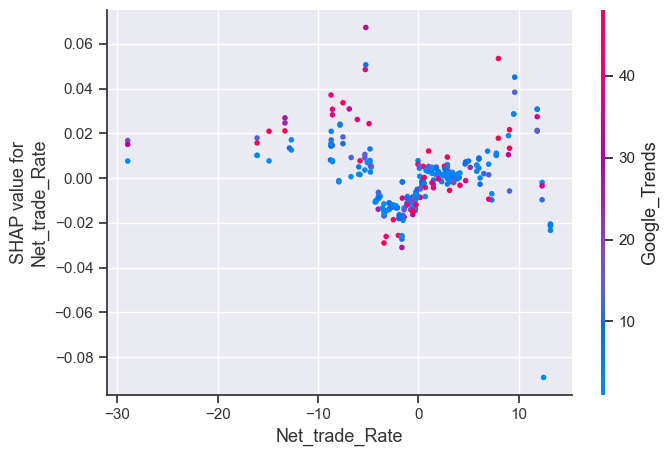

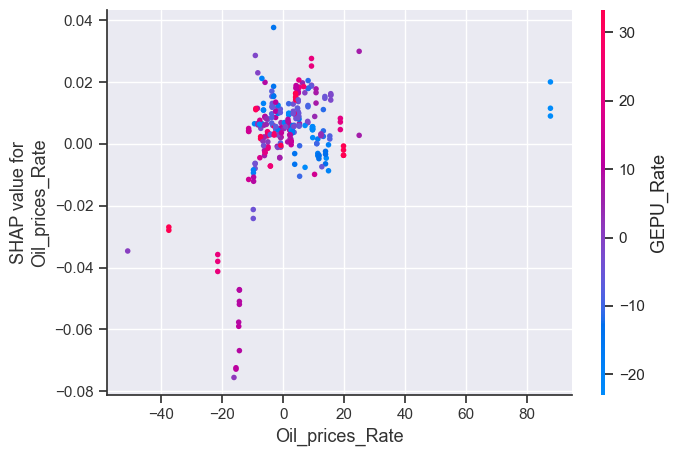

In [40]:
# Use unscaled data for X-axis interpretation
import numpy as np
if not hasattr(np, 'bool'):
    np.bool = bool
if not hasattr(np, 'int'):
    np.int = int
if not hasattr(np, 'float'):
    np.float = float  # 👈 This fixes the SHAP dependence plot issue
X_orig = data[features].loc[X_test.index]  # align with test indices

# Dependence plots for top features
top_features = ["Google_Trends", "Net_trade_Rate", "Oil_prices_Rate"]

for feature in top_features:
    shap.dependence_plot(
        feature,
        shap_values_xgb.values,
        X_orig,
        show=True
    )

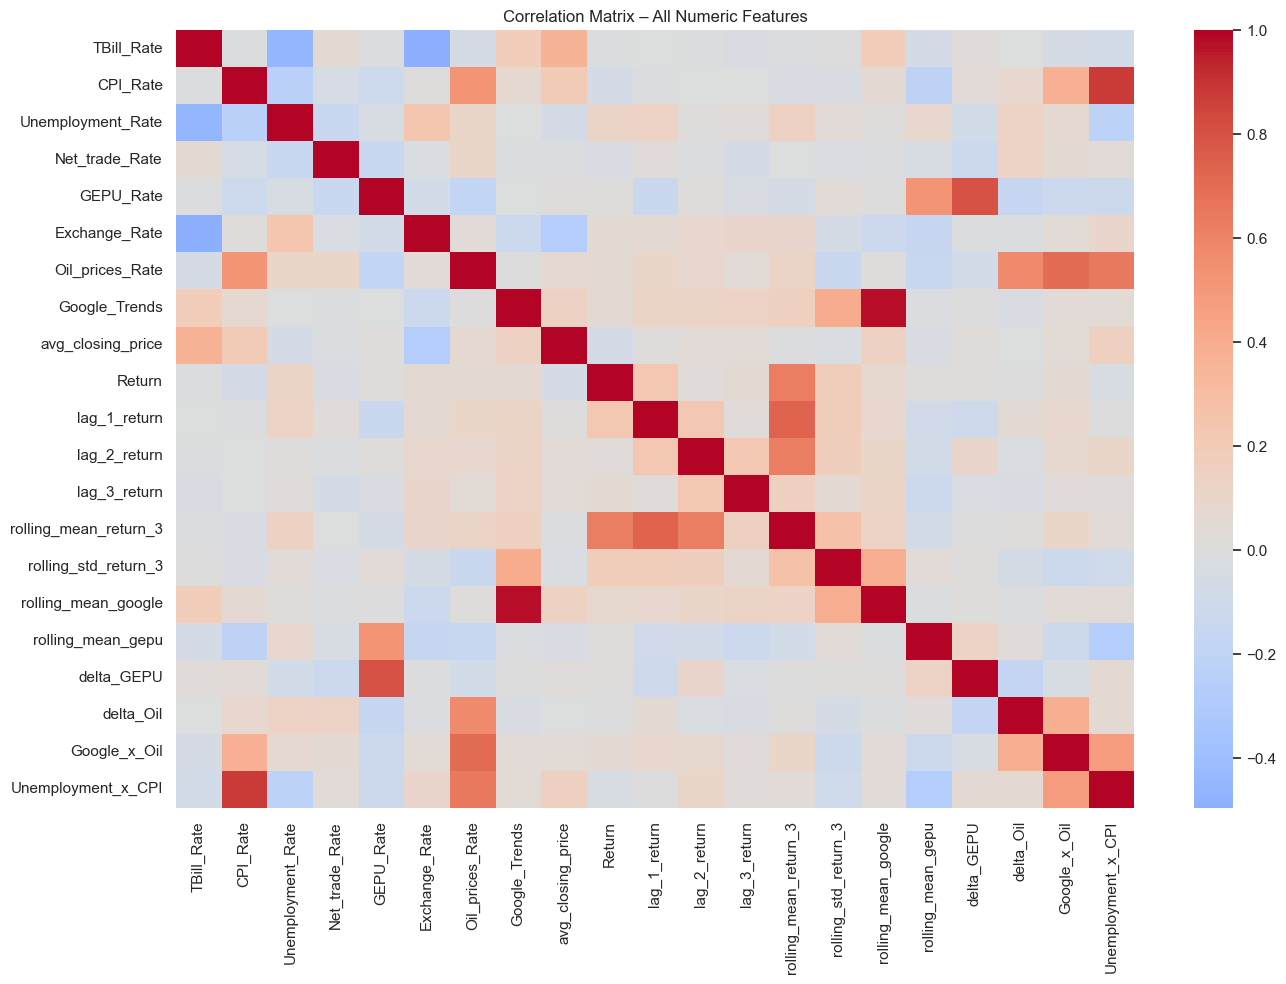

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use numeric part of your dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix – All Numeric Features")
plt.tight_layout()
plt.show()